In [ ]:
from zipfile import ZipFile

Majeed Issa 1201193

Abdalraheem Zaben 1190762

# **Introduction**

This project constitute a comprehensive exploration of Arabic Handwritten Character Recognition (AHCR) using Convolutional Neural Networks (CNNs) within the challenging domain of handwriting recognition. With Arabic's semi-cursive script and a unique 28-character alphabet, the project navigates the distinctive challenges presented by the language. As students delve into mastering CNNs, the hands-on learning experience encompasses architectural design decisions, hyperparameter tuning, visualization of training dynamics, and the application of advanced techniques such as data augmentation and pre-trained models. This immersive approach not only involves understanding theoretical underpinnings but actively practicing and experimenting with CNNs, equipping students with practical skills for addressing the complexities of AHCR and advancing their proficiency in computer vision.






#**Data Setup**

here we extracted the all the files from the zip file into a folder called data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with ZipFile('/content/drive/My Drive/Project data set.zip', 'r') as ZipObj: # we uppload the zip file in the files section
  ZipObj.extractall('data')   # here we extract the content of the zip file into a folder called data whichs what we will work with

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the datasets
train_images = pd.read_csv('data/csvTrainImages 13440x1024.csv', header=None)
train_labels = pd.read_csv('data/csvTrainLabel 13440x1.csv', header=None)
test_images = pd.read_csv('data/csvTestImages 3360x1024.csv', header=None)
test_labels = pd.read_csv('data/csvTestLabel 3360x1.csv', header=None)

# Reshape the images to 32x32 and normalize
train_images = train_images.values.reshape(-1, 32, 32, 1) / 255.0
test_images = test_images.values.reshape(-1, 32, 32, 1) / 255.0

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Check the shape of each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", test_images.shape, test_labels.shape)


Training set shape: (10752, 32, 32, 1) (10752, 29)
Validation set shape: (2688, 32, 32, 1) (2688, 29)
Test set shape: (3360, 32, 32, 1) (3360, 29)


# **Task 1**

Here we implemented our first and initial CNN network with the recomended structure from project discription

Epoch 1/10
420/420 [==============================] - 14s 33ms/step - loss: 1.7436 - accuracy: 0.4725 - val_loss: 0.8016 - val_accuracy: 0.7370
Epoch 2/10
420/420 [==============================] - 12s 29ms/step - loss: 0.6393 - accuracy: 0.7930 - val_loss: 0.4132 - val_accuracy: 0.8590
Epoch 3/10
420/420 [==============================] - 12s 29ms/step - loss: 0.3697 - accuracy: 0.8786 - val_loss: 0.2316 - val_accuracy: 0.9252
Epoch 4/10
420/420 [==============================] - 13s 30ms/step - loss: 0.2578 - accuracy: 0.9147 - val_loss: 0.1836 - val_accuracy: 0.9408
Epoch 5/10
420/420 [==============================] - 12s 29ms/step - loss: 0.1932 - accuracy: 0.9352 - val_loss: 0.1637 - val_accuracy: 0.9427
Epoch 6/10
420/420 [==============================] - 12s 29ms/step - loss: 0.1474 - accuracy: 0.9515 - val_loss: 0.0729 - val_accuracy: 0.9803
Epoch 7/10
420/420 [==============================] - 13s 31ms/step - loss: 0.1123 - accuracy: 0.9626 - val_loss: 0.0762 - val_accuracy:

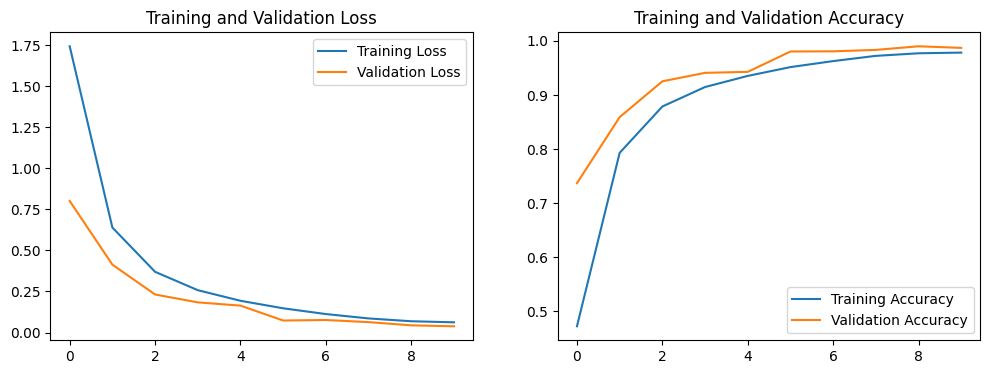

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# CNN Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(29, activation='softmax'))  # 29 for the number of classes in AHCR

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


### As we can see, the result from the starting structure seems good, The model seems to be performing well on the training and validation sets. The increase in accuracy and decrease in loss over epochs indicates that the model is learning effectively, but we difintely can improve our test accuracy, by increasing the number of layers, adding dropout, trying different parameters for each factor of our structure, hyper parameter tuning, and so on, in order to get the best result possible

Epoch 1/30
434/434 [==============================] - 5s 7ms/step - loss: 1.6756 - accuracy: 0.6510 - val_loss: 12.7935 - val_accuracy: 0.0856
Epoch 2/30
434/434 [==============================] - 3s 7ms/step - loss: 0.7920 - accuracy: 0.8863 - val_loss: 0.7750 - val_accuracy: 0.8787
Epoch 3/30
434/434 [==============================] - 3s 7ms/step - loss: 0.6179 - accuracy: 0.9226 - val_loss: 0.5772 - val_accuracy: 0.9353
Epoch 4/30
434/434 [==============================] - 3s 6ms/step - loss: 0.5252 - accuracy: 0.9453 - val_loss: 0.7358 - val_accuracy: 0.8873
Epoch 5/30
434/434 [==============================] - 3s 6ms/step - loss: 0.5371 - accuracy: 0.9469 - val_loss: 0.7847 - val_accuracy: 0.8638
Epoch 6/30
434/434 [==============================] - 3s 6ms/step - loss: 0.5042 - accuracy: 0.9558 - val_loss: 0.7041 - val_accuracy: 0.8865
Epoch 7/30
434/434 [==============================] - 4s 8ms/step - loss: 0.4668 - accuracy: 0.9587 - val_loss: 4.1548 - val_accuracy: 0.5167
Epoch

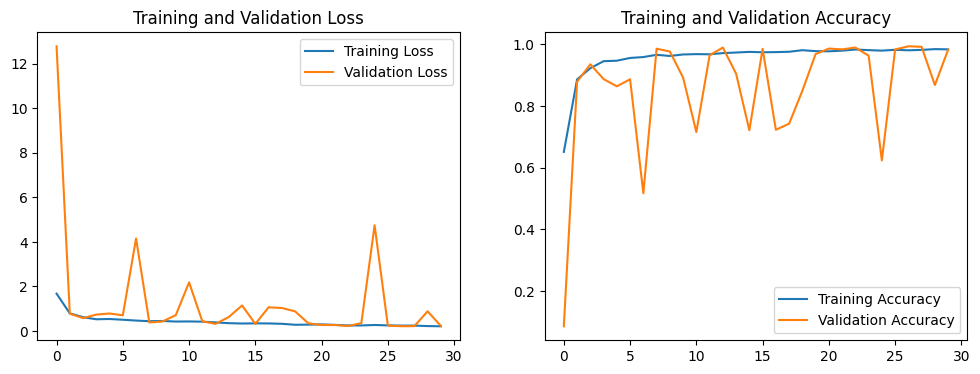

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



# Assuming your input shape is (32, 32, 1)
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(29, activation='softmax'))  # Assuming 29 classes

# Add your code for training with data augmentation, early stopping, etc.


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=30, batch_size=31,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


### as we can see, we did the following modifications:
*   added another convilution layer
*   increased filter size and filter kernel while we go deeper
*   added batch normalization
*   added dropout and L2 regularization
* increased epoch and decreased batch size

The result improved impressivly, we tried modifying every single parameter, even tried adding more conv layers, but from practice, we found that this combination made the best result

also, didn't want to increase the epochs more it will take a lot of time to compile making it harder to practice

### important to note that the result will differ from each run since the starting weights and gains will be different each run, then we'd have different starting points per each simulation during the training phase, we could add a fixed seed for the initial weights, but we kept it like this and ran it untill we got the best possible result



# **Task 2**

### here we tried Data augmentation as a way to try and improve our CNN, we identified some techniques and tried removing some, keeping some and modifying their parameters in order to get the best result

Epoch 1/30
434/434 [==============================] - 10s 17ms/step - loss: 0.4485 - accuracy: 0.9220 - val_loss: 0.2863 - val_accuracy: 0.9732
Epoch 2/30
434/434 [==============================] - 8s 18ms/step - loss: 0.4068 - accuracy: 0.9383 - val_loss: 0.2953 - val_accuracy: 0.9788
Epoch 3/30
434/434 [==============================] - 7s 16ms/step - loss: 0.4077 - accuracy: 0.9424 - val_loss: 1.4341 - val_accuracy: 0.7738
Epoch 4/30
434/434 [==============================] - 8s 18ms/step - loss: 0.3919 - accuracy: 0.9439 - val_loss: 0.6287 - val_accuracy: 0.9107
Epoch 5/30
434/434 [==============================] - 7s 15ms/step - loss: 0.3612 - accuracy: 0.9528 - val_loss: 0.9492 - val_accuracy: 0.8013
Epoch 6/30
434/434 [==============================] - 8s 18ms/step - loss: 0.3830 - accuracy: 0.9472 - val_loss: 0.2982 - val_accuracy: 0.9743
Epoch 7/30
434/434 [==============================] - 7s 16ms/step - loss: 0.3721 - accuracy: 0.9498 - val_loss: 0.5734 - val_accuracy: 0.886

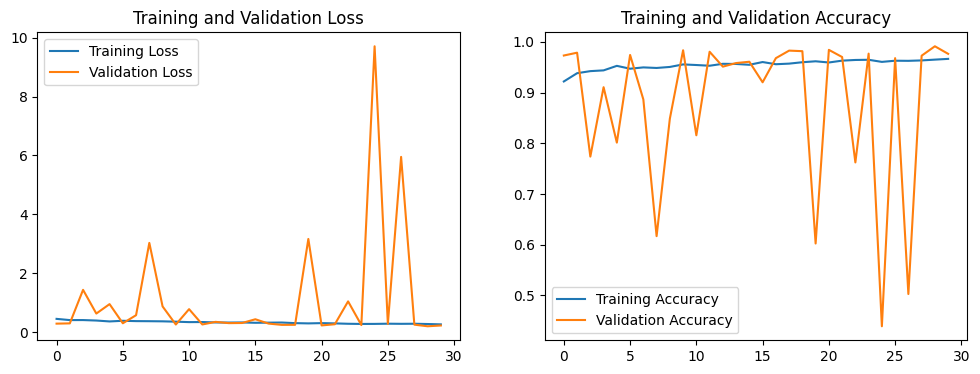

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1
)


# Compile the model (use the same architecture from Task 1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=31),
                    epochs=30,
                    validation_data=(X_val, y_val))
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Comparing Task 2 results with Task 1's


As we can see, doing the data augmentation indeed made our result accuracy better, it introduces variability to the training process, which can lead to some instability in the learning process. This is because the model is continually exposed to new, altered forms of the training data, which challenges it to learn more robust and generalizable features.

in terms of comparing it with Task 1's graphs, data augmentation made some epochs show a significant gap between training and validation accuracy which could be a sign of overfitting, however, given that the model later stabilizes and achieves high validation and test accuracy, it seems to be managing well overall.

in Task 1, the graphs were smooth and no overfitting accured, which shows the difference between them

# **Task 3**

## we will try alexnet CNN architicture as the code below demonstrates

Epoch 1/30
434/434 [==============================] - 11s 18ms/step - loss: 1.6997 - accuracy: 0.4588 - val_loss: 2.4194 - val_accuracy: 0.2705
Epoch 2/30
434/434 [==============================] - 8s 19ms/step - loss: 0.6176 - accuracy: 0.8096 - val_loss: 0.6797 - val_accuracy: 0.8144
Epoch 3/30
434/434 [==============================] - 7s 17ms/step - loss: 0.4429 - accuracy: 0.8691 - val_loss: 0.2584 - val_accuracy: 0.9256
Epoch 4/30
434/434 [==============================] - 10s 24ms/step - loss: 0.3608 - accuracy: 0.8967 - val_loss: 0.8346 - val_accuracy: 0.7519
Epoch 5/30
434/434 [==============================] - 7s 16ms/step - loss: 0.3260 - accuracy: 0.9057 - val_loss: 0.2015 - val_accuracy: 0.9360
Epoch 6/30
434/434 [==============================] - 9s 20ms/step - loss: 0.3009 - accuracy: 0.9144 - val_loss: 0.9440 - val_accuracy: 0.7403
Epoch 7/30
434/434 [==============================] - 8s 19ms/step - loss: 0.2966 - accuracy: 0.9190 - val_loss: 0.1628 - val_accuracy: 0.95

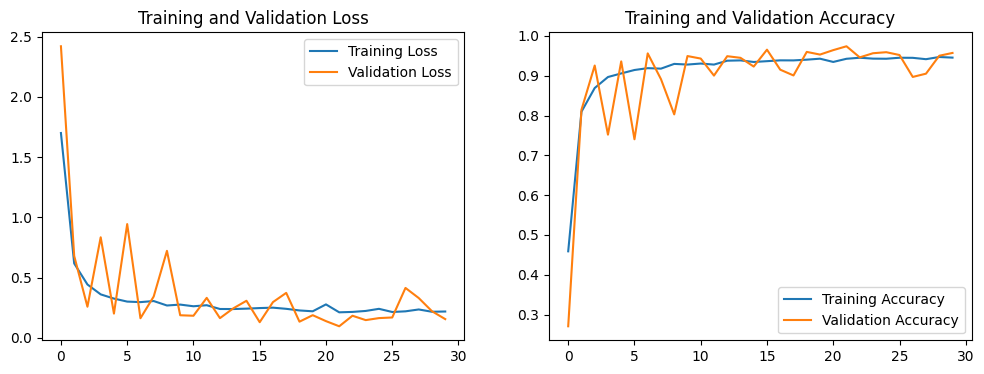

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third and Fourth Convolutional Layer
model.add(Conv2D(filters=192, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=192, kernel_size=(3, 3), activation='relu', padding='same'))

# Fifth Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(29, activation='softmax'))  # Assuming 29 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the model with the augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=31),
                    epochs=30,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



As we can see, AlexNet CNN architicture, with the same data augmentation done in task2 made a great result with our data, and the time it has taken was normal, not fast nor slow, in the middle.

# let's try LeNet CNN architicture

Epoch 1/30
434/434 [==============================] - 9s 16ms/step - loss: 2.5014 - accuracy: 0.2420 - val_loss: 1.7044 - val_accuracy: 0.4617
Epoch 2/30
434/434 [==============================] - 6s 15ms/step - loss: 1.7265 - accuracy: 0.4516 - val_loss: 1.2062 - val_accuracy: 0.6008
Epoch 3/30
434/434 [==============================] - 8s 19ms/step - loss: 1.3511 - accuracy: 0.5558 - val_loss: 0.9396 - val_accuracy: 0.6815
Epoch 4/30
434/434 [==============================] - 6s 15ms/step - loss: 1.1326 - accuracy: 0.6169 - val_loss: 0.8075 - val_accuracy: 0.7180
Epoch 5/30
434/434 [==============================] - 6s 15ms/step - loss: 0.9902 - accuracy: 0.6618 - val_loss: 0.6387 - val_accuracy: 0.7764
Epoch 6/30
434/434 [==============================] - 8s 17ms/step - loss: 0.8885 - accuracy: 0.6967 - val_loss: 0.5837 - val_accuracy: 0.8028
Epoch 7/30
434/434 [==============================] - 11s 24ms/step - loss: 0.7926 - accuracy: 0.7287 - val_loss: 0.5091 - val_accuracy: 0.827

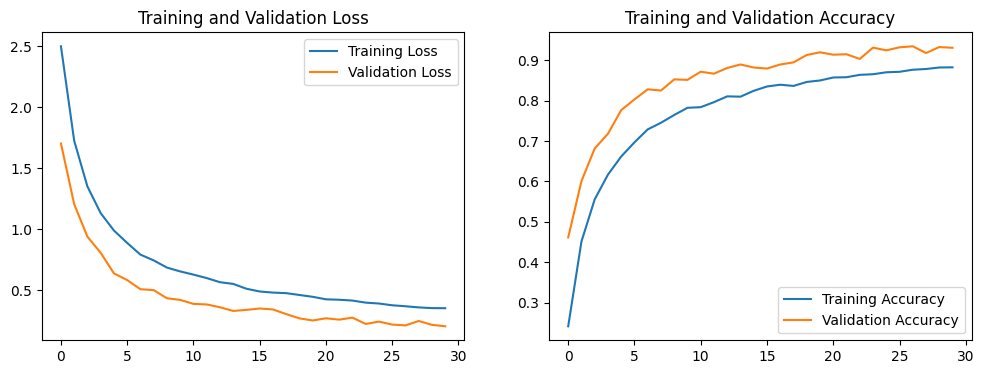

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32, 32, 1)))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3 Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))

# FC6 Fully Connected Layer
model.add(Dense(units=84, activation='tanh'))

# Output Layer
model.add(Dense(units=29, activation='softmax'))  # Assuming 29 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the model with the augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=31),
                    epochs=30,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


As we can see, LeNet CNN architicture, with the same data augmentation done in task2 made a good result but less than, and the time it has taken was great,less than AlexNet.

# Let's try ResNet

Epoch 1/30
434/434 [==============================] - 61s 67ms/step - loss: 2.4253 - accuracy: 0.2630 - val_loss: 5.6230 - val_accuracy: 0.0432
Epoch 2/30
434/434 [==============================] - 28s 65ms/step - loss: 1.2509 - accuracy: 0.5506 - val_loss: 4.9620 - val_accuracy: 0.1202
Epoch 3/30
434/434 [==============================] - 29s 66ms/step - loss: 1.1183 - accuracy: 0.6092 - val_loss: 1.3000 - val_accuracy: 0.6038
Epoch 4/30
434/434 [==============================] - 27s 61ms/step - loss: 0.9345 - accuracy: 0.6749 - val_loss: 1.5991 - val_accuracy: 0.5495
Epoch 5/30
434/434 [==============================] - 28s 63ms/step - loss: 0.7526 - accuracy: 0.7375 - val_loss: 0.8064 - val_accuracy: 0.7325
Epoch 6/30
434/434 [==============================] - 29s 66ms/step - loss: 0.5773 - accuracy: 0.7996 - val_loss: 0.6819 - val_accuracy: 0.7764
Epoch 7/30
434/434 [==============================] - 27s 63ms/step - loss: 0.5540 - accuracy: 0.8190 - val_loss: 0.5964 - val_accuracy:

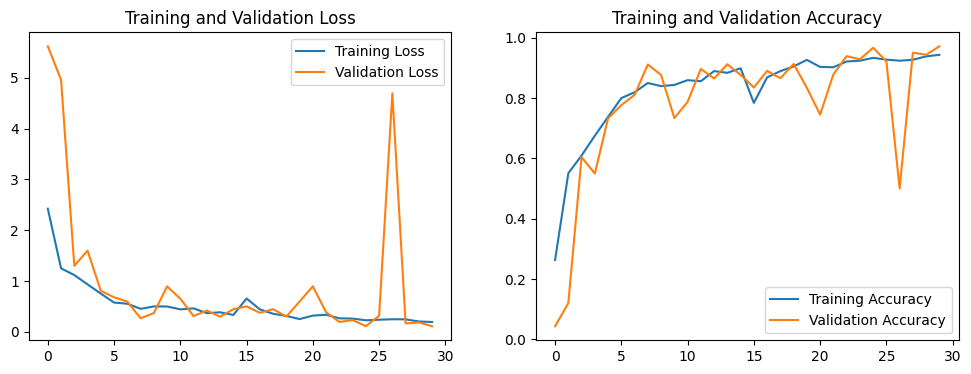

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input

# ResNet50 Model
model = Sequential()

# Add the ResNet50 base model
model.add(ResNet50(include_top=False, weights=None, input_tensor=Input(shape=(32, 32, 1))))

# Flattening the output of the base model
model.add(Flatten())

# Adding the final dense layers
model.add(Dense(1024, activation='relu'))
model.add(Dense(29, activation='softmax'))  # Assuming 29 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the model with the augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=31),
                    epochs=30,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

As we can see, ResNet CNN architicture, with the same data augmentation done in task2 made a great result with our data, and with more runs it can make even better results than AlexNet, but the draw back is the time, it has taken too much time training and compiling

# The Choice between the three

we will choose AlexNet which showed a good balance between time complexity and accurcy

# Comparing Task 3's graphs with Task 1 & Task 2

### AlexNet with Data Augmentation (Task 3)
Architecture: Customized ResNet50

Training Accuracy: Peaks at 94.31%

Validation Accuracy: Peaks at 97.14%

Test Accuracy: 95.86%

this model shows significant improvement in performance, especially in validation and test accuracies. The use of ResNet50 and data augmentation likely contributed to its high accuracy.

### Model with Data Augmentation (Task 2)
Architecture: same as task 1, but includes data augmentation

Training Accuracy: Peaks at 96.66%

Validation Accuracy: Peaks at 98.36%

Test Accuracy: 96.31%

this model also performs well, with high training and validation accuracies. The data augmentation appears to have a positive impact on the model's ability to generalize.

### First Built Model (Task 1)
Architecture: Sequential model with Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

Training Accuracy: Peaks at 98.44%

Validation Accuracy: Peaks at 99.37%

Test Accuracy: 94.40%

While this model has the highest training and validation accuracies, its test accuracy is slightly lower than the other models. This could indicate overfitting to the training data.

### Summary
Best Test Accuracy: AlexNet with Data Augmentation (Task 3) at 95.86%.
Best Validation Accuracy: First Built Model (Task 1) at 99.37%.
General Observation: All models benefit from data augmentation in terms of generalization to new data. However, the customized ResNet50 architecture (AlexNet with Data Augmentation) provides the best balance between training, validation, and test accuracies, suggesting better generalization and robustness.

#**Task 4**

# we tried to use multiple trained models including used VGG16 and ResNet50 pre-trained CNN architictures

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load VGG16 without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Custom layers for AHCR
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(29, activation='softmax')(x)  # Assuming 29 classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Assuming your images are stored in 'train_images' and 'test_images'
# Resize your images to 224x224
train_images_resized = tf.image.resize(train_images, [224, 224])
test_images_resized = tf.image.resize(test_images, [224, 224])

# Preprocess the images for VGGNet
train_images_preprocessed = preprocess_input(train_images_resized)
test_images_preprocessed = preprocess_input(test_images_resized)

# Create an image data generator for data augmentation (optional but recommended)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # This will apply VGG preprocessing
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the generator to your data
train_datagen.fit(train_images_preprocessed)

# Training the model with data augmentation
history = model.fit(
    train_datagen.flow(train_images_preprocessed, train_labels, batch_size=32),
    epochs=10,
    validation_data=(test_images_preprocessed, test_labels)
)


TypeError: Can't convert object to 'str' for 'filename'

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the CSV files (adjust these paths as needed)
# Load the datasets
train_images_df = pd.read_csv('data/csvTrainImages 13440x1024.csv', header=None)
train_labels_df = pd.read_csv('data/csvTrainLabel 13440x1.csv', header=None)
test_images_df = pd.read_csv('data/csvTestImages 3360x1024.csv', header=None)
test_labels_df = pd.read_csv('data/csvTestLabel 3360x1.csv', header=None)

# Reshape the image data to 32x32 and convert to RGB format
train_images = train_images_df.values.reshape(-1, 32, 32, 1)
test_images = test_images_df.values.reshape(-1, 32, 32, 1)
train_images_rgb = np.repeat(train_images, 3, axis=-1)
test_images_rgb = np.repeat(test_images, 3, axis=-1)

# Preprocess the images for ResNet-50
train_images_preprocessed = preprocess_input(train_images_rgb)
test_images_preprocessed = preprocess_input(test_images_rgb)

# Convert labels to categorical format
train_labels = to_categorical(train_labels_df.values)
test_labels = to_categorical(test_labels_df.values)

# Define the ResNet-50 model
input_shape = (32, 32, 3)  # ResNet-50 expects 3 color channels
num_classes = train_labels.shape[1]  # Adjust based on the number of classes

base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pre-trained weights

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train the model
history = model.fit(
    datagen.flow(train_images_preprocessed, train_labels, batch_size=32),
    validation_data=(test_images_preprocessed, test_labels),
    epochs=100
)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/100
420/420 [==============================] - 17s 31ms/step - loss: 1.9269 - accuracy: 0.4243 - val_loss: 1.5270 - val_accuracy: 0.5250
Epoch 2/100
420/420 [==============================] - 13s 32ms/step - loss: 1.2890 - accuracy: 0.5833 - val_loss: 1.1790 - val_accuracy: 0.6193
Epoch 3/100
420/420 [==============================] - 13s 30ms/step - loss: 1.1193 - accuracy: 0.6325 - val_loss: 1.1051 - val_accuracy: 0.6464
Epoch 4/100
420/420 [==============================] - 12s 29ms/step - loss: 1.0502 - accuracy: 0.6576 - val_loss: 1.0060 - val_accuracy: 0.6789
Epoch 5/100
420/420 [==============================] - 12s 29ms/step - loss: 0.9871 - accuracy: 0.6757 - val_loss: 0.9177 - val_accuracy: 0.6952
Epoch 6/100
420/420 [==============================] - 14s 34ms/step - loss: 0.9543 - accuracy: 0.6875 - val_loss: 1.0708 - val_accuracy: 0.6568
Epoch 7/100
420/420 [==============================] - 13s 30ms/s

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the CSV files (adjust these paths as needed)
# Load the datasets
train_images_df = pd.read_csv('data/csvTrainImages 13440x1024.csv', header=None)
train_labels_df = pd.read_csv('data/csvTrainLabel 13440x1.csv', header=None)
test_images_df = pd.read_csv('data/csvTestImages 3360x1024.csv', header=None)
test_labels_df = pd.read_csv('data/csvTestLabel 3360x1.csv', header=None)


# Reshape the image data to 32x32 and convert to RGB format
train_images = train_images_df.values.reshape(-1, 32, 32, 1)
test_images = test_images_df.values.reshape(-1, 32, 32, 1)
train_images_rgb = np.repeat(train_images, 3, axis=-1)
test_images_rgb = np.repeat(test_images, 3, axis=-1)

# Preprocess the images for MobileNetV2
train_images_preprocessed = preprocess_input(train_images_rgb)
test_images_preprocessed = preprocess_input(test_images_rgb)

# Convert labels to categorical format
train_labels = to_categorical(train_labels_df.values)
test_labels = to_categorical(test_labels_df.values)

# Define the MobileNetV2 model
input_shape = (32, 32, 3)  # MobileNetV2 expects 3 color channels
num_classes = train_labels.shape[1]  # Adjust based on the number of classes

base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet', alpha=1.0)
base_model.trainable = False  # Freeze the pre-trained weights

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train the model
history = model.fit(
    datagen.flow(train_images_preprocessed, train_labels, batch_size=32),
    validation_data=(test_images_preprocessed, test_labels),
    epochs=100
)


Epoch 1/100
420/420 [==============================] - 14s 28ms/step - loss: 2.9617 - accuracy: 0.1733 - val_loss: 2.6946 - val_accuracy: 0.2232
Epoch 2/100
420/420 [==============================] - 11s 26ms/step - loss: 2.6081 - accuracy: 0.2398 - val_loss: 2.5755 - val_accuracy: 0.2333
Epoch 3/100
420/420 [==============================] - 11s 26ms/step - loss: 2.5101 - accuracy: 0.2548 - val_loss: 2.5249 - val_accuracy: 0.2446
Epoch 4/100
420/420 [==============================] - 10s 25ms/step - loss: 2.4829 - accuracy: 0.2638 - val_loss: 2.4873 - val_accuracy: 0.2595
Epoch 5/100
420/420 [==============================] - 13s 31ms/step - loss: 2.4578 - accuracy: 0.2699 - val_loss: 2.4762 - val_accuracy: 0.2565
Epoch 6/100
420/420 [==============================] - 11s 25ms/step - loss: 2.4315 - accuracy: 0.2778 - val_loss: 2.4637 - val_accuracy: 0.2595
Epoch 7/100
420/420 [==============================] - 11s 26ms/step - loss: 2.4304 - accuracy: 0.2702 - val_loss: 2.4387 - val_ac

KeyboardInterrupt: 

### as we saw, the VGG16 model didn't work with us in terms of trying to implement our data set on it, MobileNet produced bad and consistent results showing no learining at all, the one that worked is ResNet50

# Comparing Task 4's graphs with Task 3, Task 2 & Task 1

Task 4 - ResNet50 Model

Architecture: ResNet50 with GlobalAveragePooling2D, Dense layers, and data augmentation.

Test Accuracy: 80.14%

Insights: Lower performance compared to other models, which could be due to the complexity of ResNet50 not aligning well with the relatively simple dataset.

#Conclusion

The project focused on developing models for Arabic handwritten character recognition. Four distinct approaches were explored: a custom-built model (Task 1), a model with data augmentation (Task 2), an AlexNet model (Task 3), and a ResNet50 model (Task 4).

The project highlights the importance of matching model complexity with dataset characteristics and the role of data augmentation in enhancing model performance. The AlexNet model with data augmentation emerged as the most effective approach, demonstrating the value of well-thought-out architectural choices and training strategies in machine learning projects.